## MODELO RANDOM FOREST ANALISIS

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("../train_limpio.csv")

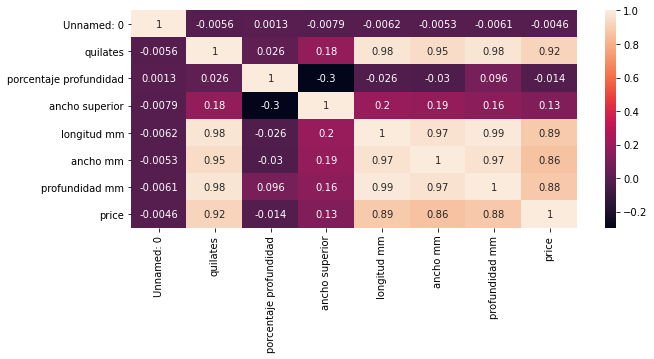

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),annot=True) 
#observamos que hay correlacion en varias variables y que nos podrian fastidiar las predicciones. #como las columnas de
#ancho longitud y profundidad se relacionan mucho entre ellas y con la columna de quilates, vamos a eliminar todas.

In [10]:
train.drop(["ancho mm","longitud mm","profundidad mm"],axis=1,inplace=True)

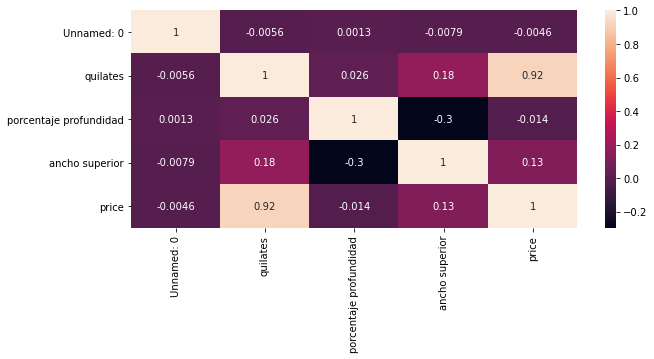

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),annot=True)  #vemos que ya no hay correlacion fuerte entre ninguna variable.

In [12]:
#ahora comprobemos si hay verdaderamente muchos valores unicos o pocos, ya que si hay muchos no nos interesa

In [13]:
train["calidad corte"].unique() #vemos que en calidad de corte no hay y ademas no hay valores mal escritos o que haya que cambiar

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [14]:
train["clarity"].unique() #en claridad tampoco

array(['VS2', 'VS1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [15]:
train["color"].unique() #tampoco en color

array(['D', 'I', 'J', 'G', 'E', 'H', 'F'], dtype=object)

**NO PODEMOS TRABAJAR CON VARIABLES CATEGORICAS SIN ANTES CONVERTIRLAS A ORDINALES CON LA FUNCION DUMMIES DE PANDAS**

In [16]:
train = pd.get_dummies(train)

In [17]:
train.head()

,Unnamed: 0,quilates,porcentaje profundidad,ancho superior,price,calidad corte_Fair,calidad corte_Good,calidad corte_Ideal,calidad corte_Premium,calidad corte_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.50,62.3,55.0,1845,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.54,63.6,60.0,10164,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,2,1.32,61.7,60.0,5513,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,3,1.20,62.1,55.0,5174,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,4,1.73,61.2,60.0,10957,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


**YA TENEMOS NUESTRO DATASET LISTO PARA ENTRENARLO!!!!**

In [18]:
#exporto mi data
train.to_csv("./train_para_entrenar.csv")